
# **Lab #1: การจัดการข้อมูลพื้นฐาน**
## **วัตถุประสงค์**
1. เรียนรู้การใช้งาน Python เบื้องต้นสำหรับการจัดการข้อมูล
2. เรียนรู้การใช้ไลบรารีสำคัญ เช่น Pandas และ GeoPandas
3. เรียนรู้การอ่าน/เขียนและสำรวจข้อมูลทางภูมิศาสตร์ (GeoData)

---
หมายเหตุ บางครั้งอาจจะเจอ Bug. ขอจงอย่าย่อท้อ ให้ใช้ทรัพยากรที่มีอยู่ในการจัดการแก้ไขปัญหา เช่น  Gemini หรือ ChatGPT แต่ทั้งนี้ต้องทำความเข้าใจกับคำตอบที่ได้ เพราะบางครั้ง AI ก็ให้คำตอบแบบงงๆ



## **1. การเริ่มต้นใช้งาน Google Colab**
### **1.1 เชื่อมต่อ Google Drive**
ก่อนอื่น ให้เชื่อมต่อ Google Drive เพื่อจัดเก็บข้อมูลของคุณ
    

In [62]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



### **1.2 ติดตั้งไลบรารีที่จำเป็น**
ติดตั้งไลบรารีที่จำเป็นสำหรับการจัดการข้อมูลและการวิเคราะห์ข้อมูลภูมิศาสตร์
    

In [63]:

!pip install pandas geopandas matplotlib



## **2. การจัดการข้อมูลตารางด้วย Pandas**
### **2.1 สร้าง DataFrame ตัวอย่าง**
ลองสร้าง DataFrame ข้อมูลประชากรของประเทศในภูมิภาค ASEAN
    

In [64]:

import pandas as pd

# สร้าง DataFrame ตัวอย่าง
data = {
    'ประเทศ': ['ไทย', 'ลาว', 'กัมพูชา', 'เวียดนาม' ,'เมียนมาร์', 'อินโดนีเซีย', 'ฟิลิปปินส์', 'มาเลเซีย', 'สิงคโปร์', 'บรูไน' ,'ติมอร์-เลสเต' ],
    'ประชากร (ล้าน)': [69.8, 7.1, 16.5, 97.3 , 55.10 , 285.70 , 117.70 , 36.00 , 5.90 , 0.47 , 1.40 ],
    'พื้นที่ (ตร.กม.)': [513120, 236800, 181035, 331210 , 676578 , 1904569 , 300000 , 330803, 734 , 5765 , 14874
 ]
}
df = pd.DataFrame(data)

# แสดงข้อมูล
print(df)

# คำนวณความหนาแน่นประชากร
df['ความหนาแน่นประชากร (คน/ตร.กม.)'] = df['ประชากร (ล้าน)'] * 1_000_000 / df['พื้นที่ (ตร.กม.)']
print('\n',df)


          ประเทศ  ประชากร (ล้าน)  พื้นที่ (ตร.กม.)
0            ไทย           69.80            513120
1            ลาว            7.10            236800
2        กัมพูชา           16.50            181035
3       เวียดนาม           97.30            331210
4      เมียนมาร์           55.10            676578
5    อินโดนีเซีย          285.70           1904569
6     ฟิลิปปินส์          117.70            300000
7       มาเลเซีย           36.00            330803
8       สิงคโปร์            5.90               734
9          บรูไน            0.47              5765
10  ติมอร์-เลสเต            1.40             14874

           ประเทศ  ประชากร (ล้าน)  พื้นที่ (ตร.กม.)  \
0            ไทย           69.80            513120   
1            ลาว            7.10            236800   
2        กัมพูชา           16.50            181035   
3       เวียดนาม           97.30            331210   
4      เมียนมาร์           55.10            676578   
5    อินโดนีเซีย          285.70           1904569   
6     ฟิ


### **2.2 การอ่านไฟล์ข้อมูล CSV**
- ให้นักศึกษาหาข้อมูลที่น่าสนใจในรูปแบบ  CSV
- โหลด File .csv เข้า google drive ของนักศึกษา
- จากนั้นให้ไปดูใน file_path ในรูป โฟลเดอร์ ด้านซ้ายบน
    

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import pandas as pd # Import the pandas library

# ตัวอย่างการอ่านไฟล์ CSV
file_path = '/content/drive/MyDrive/Colab_Notebooks/data.csv'
geo_df = pd.read_csv(file_path)

# ตรวจสอบข้อมูล
print(geo_df.head())
print(geo_df.info())

   Year Phuket visitor Phuket Revenue (m baht)
0  1988        884,293                     NaN
1  1989        971,683                6,705.89
2  1990      1,254,215                8,574.27
3  1991      1,208,594               10,699.99
4  1992      1,633,496               33,891.17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     37 non-null     int64 
 1   Phuket visitor           37 non-null     object
 2   Phuket Revenue (m baht)  36 non-null     object
dtypes: int64(1), object(2)
memory usage: 1020.0+ bytes
None


**ตอบคำถาม 5 คะแนน**

จงใช้สันชาตญาณนักภูมิศาสตร์ อธิบายข้อมูลที่ได้ ว่าเป็นข้อมูลเกี่ยวกับอะไร

ตอบ จำนวนนักท่องเที่ยวและรายได้ ของจังหวัดภูเก็ท ตั้งแต่ปี ค.ศ.1988 - 2024


## **3. การจัดการข้อมูลภูมิศาสตร์ด้วย GeoPandas** 5 คะแนน
### **3.1 การอ่าน Shapefile และแสดงผล**
ใช้ข้อมูล Shapefile ที่มีขอบเขตและมีประชากร อาจจะหาจากแหล่งข้อมูลที่ เป็น Opendata เช่น
https://data.humdata.org/dataset/worldpop-population-density-for-thailand

    

                  adm3_name       adm3_name1 adm3_name2 adm3_name3 adm3_pcode  \
0  Phraborom Maharatchawang  พระบรมมหาราชวัง       None       None   TH100101   
1       Wang Burapha Phirom   วังบูรพาภิรมย์       None       None   TH100102   
2          Wat Ratchabophit       วัดราชบพิธ       None       None   TH100103   
3                Samran Rat      สำราญราษฎร์       None       None   TH100104   
4          San Chaopho Suea   ศาลเจ้าพ่อเสือ       None       None   TH100105   

     adm2_name adm2_name1 adm2_name2 adm2_name3 adm2_pcode  ... area_sqkm  \
0  Phra Nakhon     พระนคร       None       None     TH1001  ...  1.536555   
1  Phra Nakhon     พระนคร       None       None     TH1001  ...  0.726134   
2  Phra Nakhon     พระนคร       None       None     TH1001  ...  0.211758   
3  Phra Nakhon     พระนคร       None       None     TH1001  ...  0.229786   
4  Phra Nakhon     พระนคร       None       None     TH1001  ...  0.150440   

  version lang lang1 lang2 lang3                ad

<Axes: >

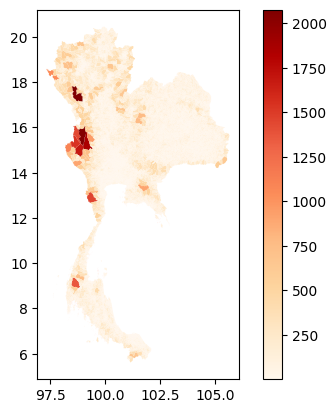

In [67]:
#ข้อมูลจารหมู
import geopandas as gpd

# อ่านไฟล์ Shapefile
shapefile_path = '/content/drive/MyDrive/Colab_Notebooks/Data/Tambol/tambol.shp'
geo_data = gpd.read_file(shapefile_path)

# แสดงข้อมูลเบื้องต้น
print(geo_data.head())
print(geo_data.crs)

#แสดงข้อมูลในคอลัม ทั้งหมด
print("Available columns:", geo_data.columns)

# แสดงผลข้อมูลบนแผนที่ (ข้อมูลประชากรคือ NOPEOPLE)
geo_data.plot(column='area_sqkm', cmap='OrRd', legend=True)


           AREA   PERIMETER  GEN_POP_  GEN_POP_ID PROV_CODE AMP_CODE  \
0  2.975014e+08   82750.914         2           1        12     1208   
1  7.949728e+08  152315.125         3           2        12     1202   
2  5.568243e+08  181335.125         4           3        12     1203   
3  1.594874e+09  286053.250         5           4        12     1206   
4  5.119119e+08  122224.469         6           5        12     1213   

   NOPEOPLE  HOUSEHOLD   NOMALE  NOFEMALE  ...  F_14YY18YY  M_14YY18YY  \
0   44689.0    10969.0  22368.0   22321.0  ...      2024.0      2041.0   
1   52111.0    12656.0  26195.0   25911.0  ...      2295.0      2374.0   
2   45602.0     9699.0  19408.0   19441.0  ...      1664.0      1570.0   
3   84718.0    20743.0  37543.0   38155.0  ...      2978.0      2923.0   
4   19753.0     4327.0   9822.0    9931.0  ...       874.0       823.0   

   F_18YY50YY  M_18YY50YY  F_50YY60YY  M_50YY60YY  F_60YYUP  M_60YYUP  \
0     11361.0     11289.0      1856.0      1867.0

<Axes: >

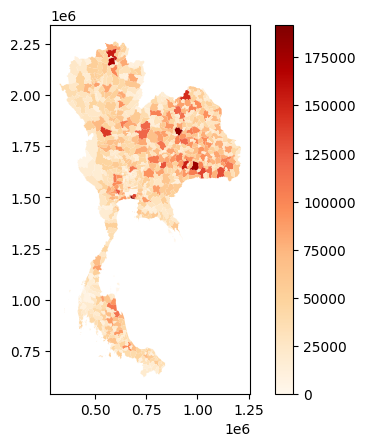

In [68]:
#ข้อมูลจารโน๊ต
import geopandas as gpd

# อ่านไฟล์ Shapefile
shapefile_path = '/content/drive/MyDrive/Colab_Notebooks/Data/GEN_POP_Extracted/gen_pop.shp'
geo_data = gpd.read_file(shapefile_path)

# แสดงข้อมูลเบื้องต้น
print(geo_data.head())
print(geo_data.crs)

#แสดงข้อมูลในคอลัม ทั้งหมด
print("Available columns:", geo_data.columns)

# แสดงผลข้อมูลบนแผนที่ (ข้อมูลประชากรคือ NOPEOPLE)
geo_data.plot(column='NOPEOPLE', cmap='OrRd', legend=True)



## **4. การแสดงผลข้อมูล**
### **4.1 สร้างกราฟด้วย Matplotlib**  5 คะแนน
สร้างกราฟแสดงประชากรของแต่ละประเทศในภูมิภาค ASEAN โดยให้นักศึกษาทดลองหาข้อมูลเอง
    

In [69]:
#ต้นฉบับจากอาจารย์
#import matplotlib.pyplot as plt

# สร้างกราฟแสดงประชากร
#plt.bar(df['ประเทศ'], df['ประชากร (ล้าน)'], color='skyblue')
#plt.title('จำนวนประชากรในแต่ละประเทศ')
#plt.xlabel('ประเทศ')
#plt.ylabel('ประชากร (ล้าน)')
#plt.show()


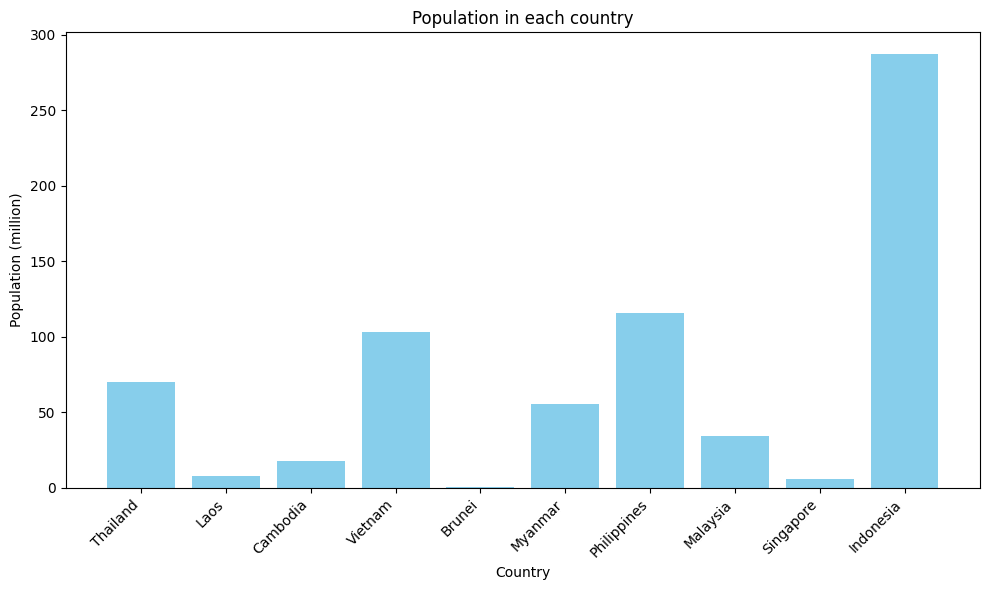

Credits : www.statista.com/statistics/796222/total-population-of-the-asean-countries/?srsltid=AfmBOoq04s34JGY7fh0Q9D0U5tIfFIITR6a8QVwecSPYR8_JU3Exw8ew


In [70]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Country': ['Thailand', 'Laos', 'Cambodia', 'Vietnam', 'Brunei',
                'Myanmar', 'Philippines', 'Malaysia', 'Singapore', 'Indonesia'],
    'Population (million)': [70.37, 7.89, 17.53, 102.94, 0.47,
                             55.42, 115.59, 34.23, 6.12, 287.2]
}

# Create a new DataFrame from the 'data' dictionary
plot_df = pd.DataFrame(data)

# Create a bar chart showing population in English
plt.figure(figsize=(10, 6))
plt.bar(plot_df['Country'], plot_df['Population (million)'], color='skyblue') # ใช้ plot_df แทน df
plt.title('Population in each country')
plt.xlabel('Country')
plt.ylabel('Population (million)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

print('Credits : www.statista.com/statistics/796222/total-population-of-the-asean-countries/?srsltid=AfmBOoq04s34JGY7fh0Q9D0U5tIfFIITR6a8QVwecSPYR8_JU3Exw8ew')


### **4.2 การรวมข้อมูลเชิงพื้นที่และตาราง**
รวมข้อมูล Shapefile กับข้อมูลประชากรเพื่อแสดงข้อมูลประชากรในแต่ละจังหวัด โดยให้นักศึกษาทดลองหาข้อมูลเอง
    

## **แผนที่ประชากรจังหวัดในประเทศไทย (รวมข้อมูลจาก Excel)**

ในส่วนนี้ เราจะดำเนินการตามที่ผู้ใช้ร้องขอ โดยจะโหลด GeoDataFrame ของจังหวัดในประเทศไทย และข้อมูลประชากรจากไฟล์ Excel ที่ระบุ จากนั้นจะผสานข้อมูลทั้งสองเข้าด้วยกันและสร้างแผนที่ Choropleth เพื่อแสดงผลประชากรครับ

In [72]:
#ต้นฉบับ
# รวมข้อมูล
#merged_data = geo_data.merge(df, left_on='province', right_on='ประเทศ')

# แสดงผลข้อมูลในแผนที่
#merged_data.plot(column='ประชากร (ล้าน)', cmap='OrRd', legend=True, figsize=(12, 8))
#plt.title('ประชากรในแต่ละจังหวัด')
#plt.show()


โหลด Shapefile จาก /content/drive/MyDrive/Colab_Notebooks/Data/GE234/Lab1/thi/tha_admin1.shp สำเร็จ
โหลดข้อมูลประชากรจาก Excel (/content/drive/MyDrive/Colab_Notebooks/Data/GE234/Lab1/thi/tha_admin8.dbf..xlsx) สำเร็จ

คอลัมน์ที่มีใน GeoDataFrame จังหวัดไทย: ['adm1_name', 'adm1_name1', 'adm1_name2', 'adm1_name3', 'adm1_pcode', 'adm0_name', 'adm0_name1', 'adm0_name2', 'adm0_name3', 'adm0_pcode', 'valid_on', 'valid_to', 'area_sqkm', 'version', 'lang', 'lang1', 'lang2', 'lang3', 'adm1_ref_n', 'center_lat', 'center_lon', 'geometry']
คอลัมน์ที่มีใน DataFrame ประชากรจาก Excel: ['adm1_name', 'adm1_name1', 'pop', 'adm1_name3', 'adm1_pcode', 'adm0_name', 'adm0_name1', 'adm0_name2', 'adm0_name3', 'adm0_pcode', 'valid_on', 'valid_to', 'area_sqkm', 'version', 'lang', 'lang1', 'lang2', 'lang3', 'adm1_ref_n', 'center_lat', 'center_lon']

ผสานข้อมูลสำเร็จแล้ว.

Head ของข้อมูลที่ผสานแล้ว:
                 adm1_name_x     adm1_name1_x adm1_name2 adm1_name3_x  \
0                   Bangkok    กรุงเทพมหานค

/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3611 (\N{THAI CHARACTER PO PLA}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3632 (\N{THAI CHARACTER SARA A}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3594 (\N{THAI CHARACTER CHO CHANG}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarni

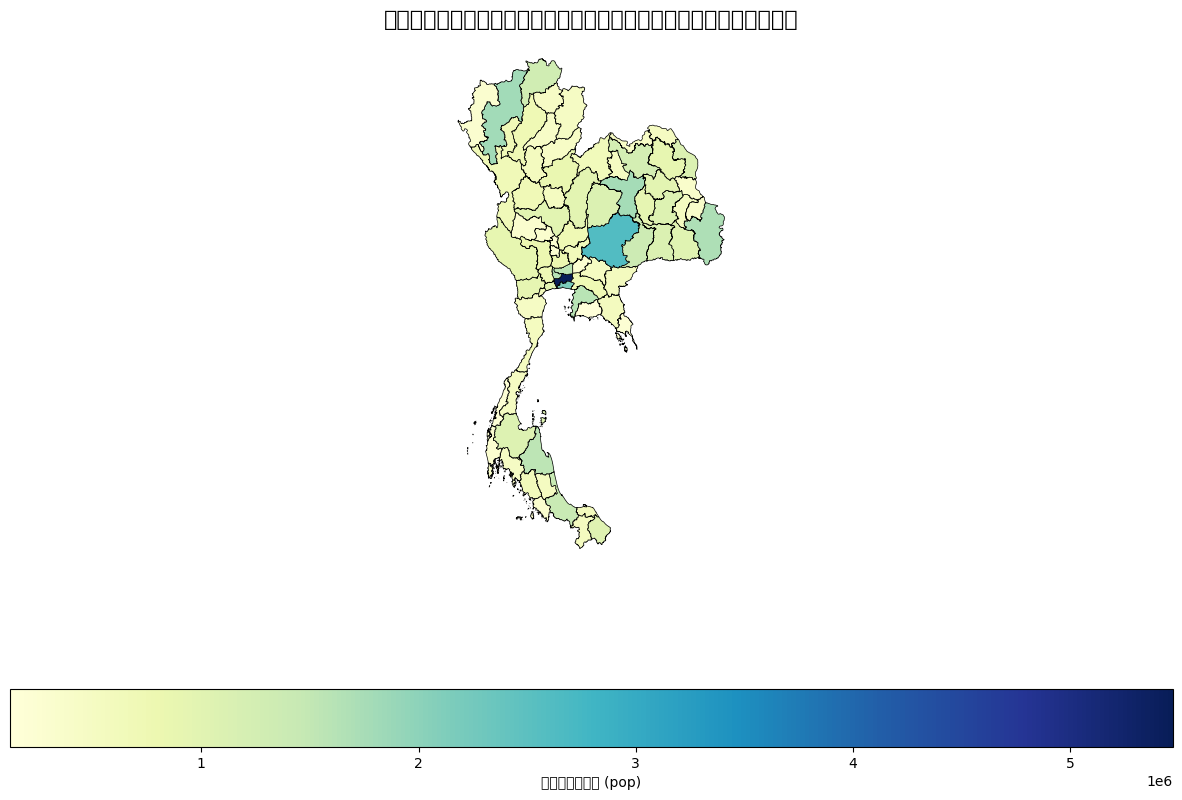

In [84]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- กำหนดเส้นทางไฟล์ ---
shapefile_dir_thai = '/content/drive/MyDrive/Colab_Notebooks/Data/GE234/Lab1/thi'
shapefile_name_thai = 'tha_admin1.shp'
shapefile_path_thai = os.path.join(shapefile_dir_thai, shapefile_name_thai)

population_file_name_excel = 'tha_admin8.dbf..xlsx' # ยืนยันว่าเป็นไฟล์ Excel
population_file_path_excel = os.path.join(shapefile_dir_thai, population_file_name_excel)

# --- โหลดไฟล์ Shapefile ---
try:
    thai_provinces_geo_df = gpd.read_file(shapefile_path_thai)
    print(f"โหลด Shapefile จาก {shapefile_path_thai} สำเร็จ")
except Exception as e:
    print(f"**ข้อผิดพลาดในการโหลด Shapefile: {e}**")
    print("โปรดตรวจสอบเส้นทางไฟล์ Shapefile และไฟล์ประกอบ (เช่น .dbf, .shx)")
    raise

# --- โหลดไฟล์ประชากรจาก Excel ---
try:
    population_df = pd.read_excel(population_file_path_excel)
    print(f"โหลดข้อมูลประชากรจาก Excel ({population_file_path_excel}) สำเร็จ")
except Exception as e:
    print(f"**ข้อผิดพลาดในการโหลดไฟล์ Excel: {e}**")
    print("โปรดตรวจสอบเส้นทางไฟล์ Excel และนามสกุลไฟล์ (.xlsx)")
    raise

# --- แสดงคอลัมน์เพื่อช่วยในการระบุคีย์สำหรับผสาน ---
print("\nคอลัมน์ที่มีใน GeoDataFrame จังหวัดไทย:", thai_provinces_geo_df.columns.tolist())
print("คอลัมน์ที่มีใน DataFrame ประชากรจาก Excel:", population_df.columns.tolist())

# --- กำหนดคีย์สำหรับผสานและคอลัมน์ประชากร ---
# Assumption: 'adm1_pcode' in GeoDataFrame is the merge key
# Assumption: 'adm1_pcode' or 'PROV_CODE' in Excel is the merge key
# Assumption: 'pop' in Excel is the population column

geo_merge_key = 'adm1_pcode'
pop_merge_key = None
population_column_name = 'pop'

# ตรวจสอบคีย์สำหรับผสานใน DataFrame ประชากร
if 'adm1_pcode' in population_df.columns:
    pop_merge_key = 'adm1_pcode'
elif 'PROV_CODE' in population_df.columns:
    pop_merge_key = 'PROV_CODE'
else:
    raise KeyError("ไม่พบคอลัมน์รหัสจังหวัด ('adm1_pcode' หรือ 'PROV_CODE') ในไฟล์ Excel สำหรับการผสาน. โปรดระบุคอลัมน์ที่ถูกต้อง.")

# ตรวจสอบคอลัมน์ประชากร
if population_column_name not in population_df.columns:
    raise KeyError(f"ไม่พบคอลัมน์ประชากร '{population_column_name}' ในไฟล์ Excel. โปรดระบุคอลัมน์ที่ถูกต้อง.")

# --- เตรียมข้อมูลก่อนผสาน ---
# แปลงคีย์สำหรับผสานให้เป็นประเภทสตริงเพื่อป้องกันข้อผิดพลาด
thai_provinces_geo_df[geo_merge_key] = thai_provinces_geo_df[geo_merge_key].astype(str)
population_df[pop_merge_key] = population_df[pop_merge_key].astype(str)

# --- ผสานข้อมูล ---
merged_data = thai_provinces_geo_df.merge(population_df, left_on=geo_merge_key, right_on=pop_merge_key, how='left')
print("\nผสานข้อมูลสำเร็จแล้ว.")

# แสดงข้อมูล 5 แถวแรกและข้อมูลเชิงลึกของ merged_data
print("\nHead ของข้อมูลที่ผสานแล้ว:\n", merged_data.head())
print("\nข้อมูลเชิงลึกของข้อมูลที่ผสานแล้ว:")
merged_data.info()

# --- สร้างแผนที่ประชากร ---
if population_column_name in merged_data.columns:
    print(f"\nกำลังสร้างแผนที่ประชากรโดยใช้คอลัมน์ '{population_column_name}'...")

    # แปลงข้อมูลประชากรเป็นตัวเลขและจัดการค่าที่หายไป (NaN) ด้วยการเติม 0
    merged_data[population_column_name] = pd.to_numeric(merged_data[population_column_name], errors='coerce').fillna(0)

    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged_data.plot(
        column=population_column_name,
        cmap='YlGnBu', # โทนสีสำหรับข้อมูลประชากร
        legend=True,
        ax=ax,
        legend_kwds={'label': f"ประชากร ({population_column_name})", 'orientation': "horizontal"},
        edgecolor='black',
        linewidth=0.5
    )
    plt.title('แผนที่ประชากรจังหวัดในประเทศไทย', fontsize=16)
    plt.xlabel('ลองจิจูด', fontsize=12)
    plt.ylabel('ละติจูด', fontsize=12)
    ax.set_axis_off() # ปิดแกนเพื่อความสะอาดของแผนที่
    plt.show()
else:
    print(f"**ข้อผิดพลาด:** ไม่พบคอลัมน์ '{population_column_name}' ในข้อมูลที่ผสานแล้ว ไม่สามารถสร้างแผนที่ได้")



## **โจทย์สำหรับนักศึกษา** 15 คะแนน
1. ลองเพิ่มประเทศใหม่ใน DataFrame พร้อมคำนวณความหนาแน่นประชากร (5 คะแนน)
2. นำไฟล์ Shapefile ของพื้นที่อื่นมาแสดงผลใน GeoPandas (5 คะแนน)
3. ลองสร้างแผนที่ด้วยสีที่แตกต่างกันโดยใช้ค่าอื่น เช่น `area` หรือ `density` (5 คะแนน)

---

### **หมายเหตุ**
- ดาวน์โหลดข้อมูลจากแหล่ง Open Data เช่น [World Bank Open Data](https://data.worldbank.org) หรือ [Thailand Data Catalog](https://data.go.th)
- ใส่เครดิตแหล่งข้อมูลในรายงานของคุณ
    

In [87]:
#1.
import pandas as pd

data = {
    'ประเทศ': ['บราซิล' , 'ชิลี' , 'เอกวาดอร์'],
    'ประชากร (ล้าน)': [ 217.2 , 19.6, 17.4 ],
    'พื้นที่ (ตร.กม.)': [ 8515767 , 756102 , 283561]
}

df = pd.DataFrame(data)
print (df)
print('Credits : https://www.worldometers.info/world-population/population-by-country/#google_vignette')

      ประเทศ  ประชากร (ล้าน)  พื้นที่ (ตร.กม.)
0     บราซิล           217.2           8515767
1       ชิลี            19.6            756102
2  เอกวาดอร์            17.4            283561
Credits : https://www.worldometers.info/world-population/population-by-country/#google_vignette


   Id      area                                           geometry
0   0  43.10370  POLYGON ((235724.215 6241332.717, 235726.696 6...
1   0  18.11420  POLYGON ((235728.519 6241324.021, 235729.086 6...
2   0   2.85910  POLYGON ((235725.254 6241328.063, 235725.122 6...
3   0   2.17471  POLYGON ((235753.532 6241335.438, 235753.336 6...
4   0   2.75481  POLYGON ((235769.166 6241309.579, 235768.954 6...
None
Available columns: Index(['Id', 'area', 'geometry'], dtype='object')


แผนที่สวนในพระราชวังแวร์ซาย
ผมทำการ digitizing เอง



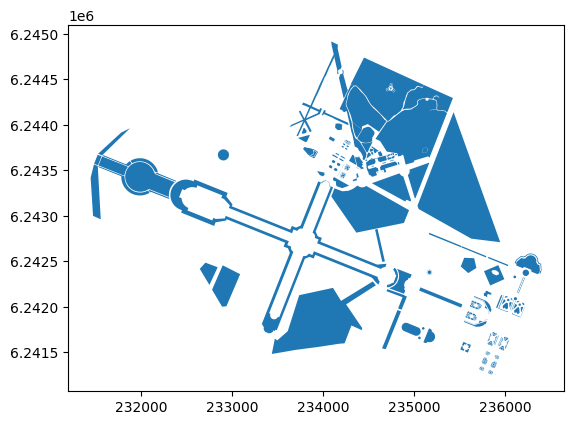

In [74]:
#2.
import geopandas as gpd

# ระบุเส้นทางไปยังไฟล์ Shapefile ที่คุณอัปโหลดมาใหม่
# ตัวอย่าง: shapefile_path = '/content/drive/MyDrive/Colab Notebooks/Data/New_Area/new_area.shp'
shapefile_path = '/content/drive/MyDrive/Colab_Notebooks/Data/GE234/Lab1/Park/Park.shp' # กรุณาแก้ไขเส้นทางนี้เป็นของไฟล์คุณเอง

# อ่านไฟล์ Shapefile
new_geo_data = gpd.read_file(shapefile_path)

# แสดงข้อมูลเบื้องต้น
print(new_geo_data.head())
print(new_geo_data.crs)

# แสดงข้อมูลในคอลัมน์ทั้งหมด
print("Available columns:", new_geo_data.columns)

# แสดงผลข้อมูลบนแผนที่
new_geo_data.plot()

print('''\n\nแผนที่สวนในพระราชวังแวร์ซาย
ผมทำการ digitizing เอง
''')

รายการไฟล์ในไดเรกทอรี Shapefile (/content/drive/MyDrive/Colab_Notebooks/Data/GE234/Lab1/์No3):
- us-states---ranking-by-population-2026.csv
- tl_2025_us_state.prj
- tl_2025_us_state.dbf
- tl_2025_us_state.cpg
- tl_2025_us_state.shx
- tl_2025_us_state.shp.iso.xml
- tl_2025_us_state.shp.ea.iso.xml
- tl_2025_us_state.shp

คอลัมน์ใน GeoDataFrame (us_states_geo_df): ['REGION', 'DIVISION', 'STATEFP', 'STATENS', 'GEOID', 'GEOIDFQ', 'STUSPS', 'NAME', 'LSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry']
คอลัมน์ใน DataFrame ประชากร (us_states_population_df): ['state', 'code', 'fips', 'pop2020', 'pop2025', 'pop2026', 'population', 'growthRate', 'growthRate2020', 'densityMi', 'rank', 'percent']

5 แถวแรกของข้อมูลที่ผสานแล้ว:
   REGION DIVISION STATEFP   STATENS GEOID      GEOIDFQ STUSPS            NAME  \
0      1        2      36  01779796    36  0400000US36     NY        New York   
1      4        8      32  01779793    32  0400000US32     NV          Nevada   
2 

/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3611 (\N{THAI CHARACTER PO PLA}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3632 (\N{THAI CHARACTER SARA A}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3594 (\N{THAI CHARACTER CHO CHANG}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarni

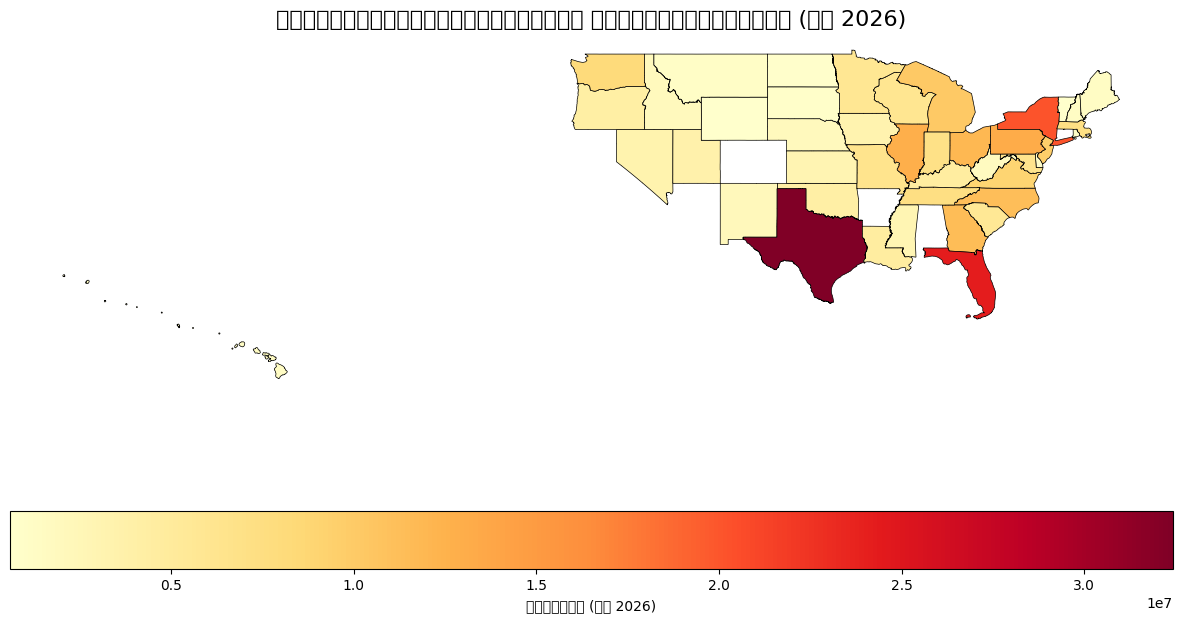


กำลังสร้างแผนที่ความหนาแน่นประชากร...


/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3627 (\N{THAI CHARACTER HO HIP}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarni

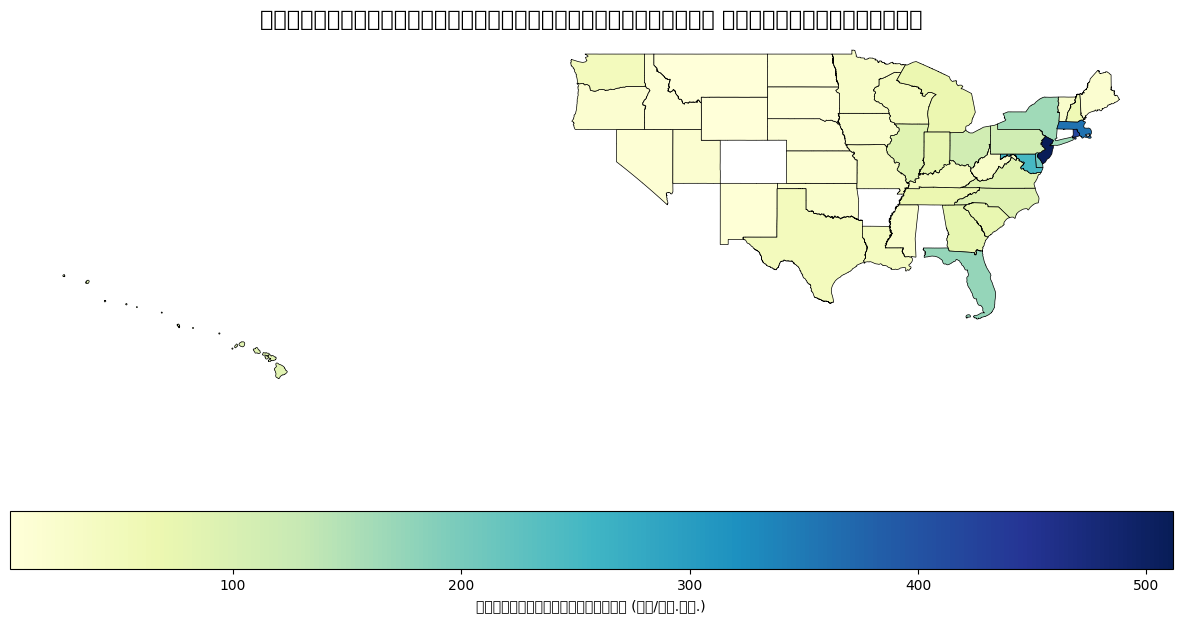

ข้อมูลจาก : https://worldpopulationreview.com/states


In [75]:
#3.
#ใช้ Ai
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

# กำหนดเส้นทางไปยังไฟล์ Shapefile และ CSV
# ตรวจสอบให้แน่ใจว่าไฟล์ .shp, .dbf, .shx และไฟล์อื่นๆ ที่เกี่ยวข้องอยู่ในโฟลเดอร์เดียวกัน
shapefile_dir = '/content/drive/MyDrive/Colab_Notebooks/Data/GE234/Lab1/์No3'
shapefile_name = 'tl_2025_us_state.shp'
shapefile_path = os.path.join(shapefile_dir, shapefile_name)

csv_file_path = '/content/drive/MyDrive/Colab_Notebooks/Data/GE234/Lab1/์No3/us-states---ranking-by-population-2026.csv'

# --- ตรวจสอบไฟล์ในไดเรกทอรี Shapefile (เพื่อช่วยในการดีบั๊กหากยังคงเกิดปัญหา) ---
print(f"รายการไฟล์ในไดเรกทอรี Shapefile ({shapefile_dir}):")
if os.path.exists(shapefile_dir):
    for file in os.listdir(shapefile_dir):
        print(f"- {file}")
else:
    print(f"**ข้อผิดพลาด: ไดเรกทอรี Shapefile ไม่พบที่: {shapefile_dir}**")
    raise FileNotFoundError(f"Shapefile directory not found at {shapefile_dir}")

# โหลดไฟล์ Shapefile เข้าสู่ GeoDataFrame
try:
    us_states_geo_df = gpd.read_file(shapefile_path)
except Exception as e:
    print(f"**ข้อผิดพลาดในการโหลด Shapefile: {e}**")
    print("โปรดตรวจสอบว่าไฟล์ .shp, .dbf, .shx ทั้งหมดอยู่ในโฟลเดอร์เดียวกันและมีชื่อถูกต้อง")
    raise

# โหลดไฟล์ CSV ข้อมูลประชากรเข้าสู่ Pandas DataFrame
try:
    us_states_population_df = pd.read_csv(csv_file_path)
except Exception as e:
    print(f"**ข้อผิดพลาดในการโหลด CSV: {e}**")
    print("โปรดตรวจสอบเส้นทางไฟล์ CSV และรูปแบบไฟล์")
    raise

# แสดงคอลัมน์ของแต่ละ DataFrame เพื่อตรวจสอบ
print("\nคอลัมน์ใน GeoDataFrame (us_states_geo_df):", us_states_geo_df.columns.tolist())
print("คอลัมน์ใน DataFrame ประชากร (us_states_population_df):", us_states_population_df.columns.tolist())

# --- เตรียมข้อมูลสำหรับการผสาน ---
# เราจะใช้ 'STATEFP' จาก GeoDataFrame และ 'fips' จาก DataFrame ประชากร
# ตรวจสอบว่าคอลัมน์เหล่านี้มีอยู่จริง
if 'STATEFP' not in us_states_geo_df.columns:
    raise KeyError("ไม่พบ 'STATEFP' ใน GeoDataFrame. ไม่สามารถผสานข้อมูลได้.")
if 'fips' not in us_states_population_df.columns:
    raise KeyError("ไม่พบ 'fips' ใน DataFrame ประชากร. ไม่สามารถผสานข้อมูลได้.")

# แปลงคอลัมน์สำหรับผสานให้เป็นประเภทสตริง
us_states_geo_df['STATEFP'] = us_states_geo_df['STATEFP'].astype(str)
us_states_population_df['fips'] = us_states_population_df['fips'].astype(str)

# ผสาน GeoDataFrame และ DataFrame ประชากรเข้าด้วยกันโดยใช้ 'STATEFP' และ 'fips'
merged_data = us_states_geo_df.merge(us_states_population_df, left_on='STATEFP', right_on='fips', how='left')

# แสดงข้อมูล 5 แถวแรกและข้อมูลเชิงลึกของ merged_data เพื่อตรวจสอบ
print("\n5 แถวแรกของข้อมูลที่ผสานแล้ว:\n", merged_data.head())
print("\nข้อมูลเชิงลึกของ merged_data:")
merged_data.info()

# --- คำนวณความหนาแน่นประชากรและสร้างแผนที่ ---
# คำนวณ POP_DENSITY (คน/ตร.กม.)
if 'pop2026' in merged_data.columns and 'ALAND' in merged_data.columns:
    merged_data['ALAND_sqkm'] = merged_data['ALAND'] / 1_000_000
    merged_data['POP_DENSITY'] = merged_data.apply(
        lambda row: row['pop2026'] / row['ALAND_sqkm'] if row['ALAND_sqkm'] > 0 else 0,
        axis=1
    )

    # แผนที่ที่ 1: Population 2026
    print("\nกำลังสร้างแผนที่ประชากร (pop2026)...")
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged_data.plot(
        column='pop2026',
        cmap='YlOrRd',
        legend=True,
        ax=ax,
        legend_kwds={'label': "ประชากร (ปี 2026)", 'orientation': "horizontal"},
        edgecolor='black',
        linewidth=0.5
    )
    plt.title('แผนที่ประชากรในรัฐต่างๆ ของสหรัฐอเมริกา (ปี 2026)', fontsize=16)
    plt.xlabel('ลองจิจูด', fontsize=12)
    plt.ylabel('ละติจูด', fontsize=12)
    ax.set_axis_off()
    plt.show()

    # แผนที่ที่ 2: Population Density
    print("\nกำลังสร้างแผนที่ความหนาแน่นประชากร...")
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged_data.plot(
        column='POP_DENSITY',
        cmap='YlGnBu',
        legend=True,
        ax=ax,
        legend_kwds={'label': "ความหนาแน่นประชากร (คน/ตร.กม.)", 'orientation': "horizontal"},
        edgecolor='black',
        linewidth=0.5
    )
    plt.title('แผนที่ความหนาแน่นประชากรในรัฐต่างๆ ของสหรัฐอเมริกา', fontsize=16)
    plt.xlabel('ลองจิจูด', fontsize=12)
    plt.ylabel('ละติจูด', fontsize=12)
    ax.set_axis_off()
    plt.show()

elif 'ALAND' in merged_data.columns:
    print("\nไม่พบ 'pop2026' แต่พบ 'ALAND' กำลังสร้างแผนที่แสดงพื้นที่...")
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged_data.plot(
        column='ALAND',
        cmap='Greens',
        legend=True,
        ax=ax,
        legend_kwds={'label': "พื้นที่ (ตร.ม.)", 'orientation': "horizontal"},
        edgecolor='black',
        linewidth=0.5
    )
    plt.title('แผนที่พื้นที่ดินในรัฐต่างๆ ของสหรัฐอเมริกา', fontsize=16)
    plt.xlabel('ลองจิจูด', fontsize=12)
    plt.ylabel('ละติจูด', fontsize=12)
    ax.set_axis_off()
    plt.show()
else:
    print("ข้อผิดพลาด: ไม่พบข้อมูลที่จำเป็น (pop2026 หรือ ALAND) ในข้อมูลที่ผสานแล้ว ไม่สามารถสร้างแผนที่ได้")
print('ข้อมูลจาก : https://worldpopulationreview.com/states')